In [1]:
import xarray as xr
import numpy as np
from dask import array as darr

In [2]:
data = xr.DataArray(
    [[1, 2], [3, 4]],
    dims=("x", "y"),
    name="data",
)

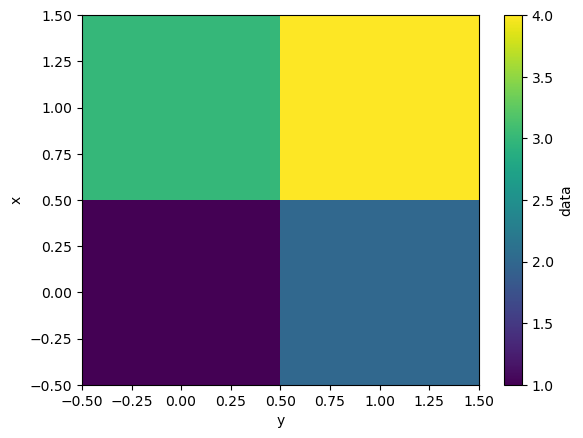

In [3]:
data.plot()

In [4]:
mask = xr.DataArray(
    [[0, 1], [1, 0]],
    dims=("x", "y"),
    name="mask",
).astype(bool)

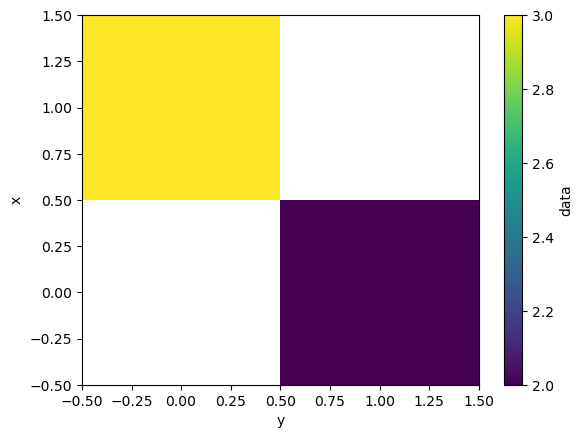

In [5]:
data.where(mask).plot()

In [6]:
valid_data = (data > 1.5)
valid_data

<xarray.DataArray 'data' (x: 2, y: 2)>
array([[False,  True],
       [ True,  True]])
Dimensions without coordinates: x, y

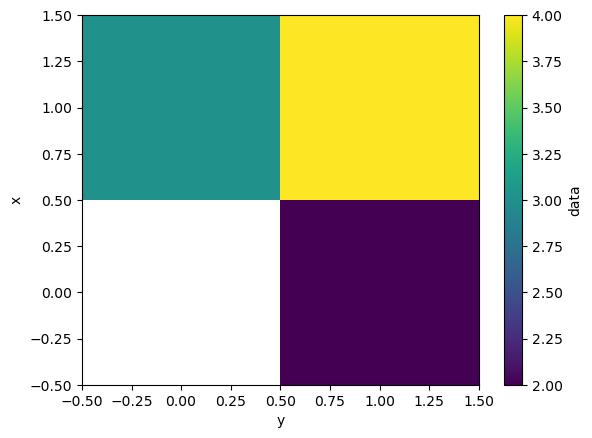

In [7]:
data.where(valid_data).plot()

In [8]:
data = xr.DataArray(
    np.random.normal(size=(11, 12, 24)).astype("float32"),
    dims=("x", "y", "t"),
    name="data",
)

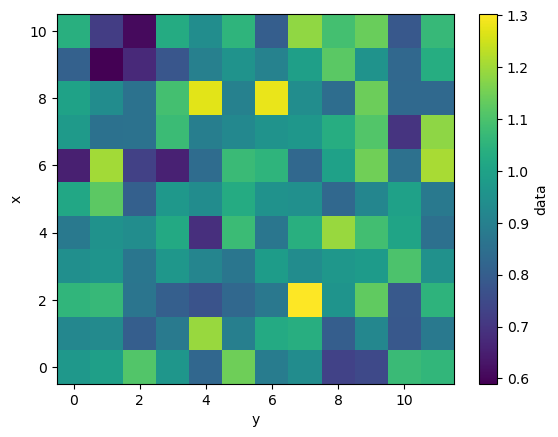

In [9]:
data.std("t").plot()

In [10]:
mask = xr.DataArray(
    np.random.uniform(0, 1, size=(11, 12)) < 0.05,
    dims=("x", "y"),
    name="mask",
)

In [11]:
mask

<xarray.DataArray 'mask' (x: 11, y: 12)>
array([[False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False,  True, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False,  True, False, False, False, False, False, False,  True,
        False, False,  True],
       [False, False, False, False, False, False,  True, False, False,
        False,  True, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False,  True, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False,  True, False]])
Dimensions without coordinates: x, y

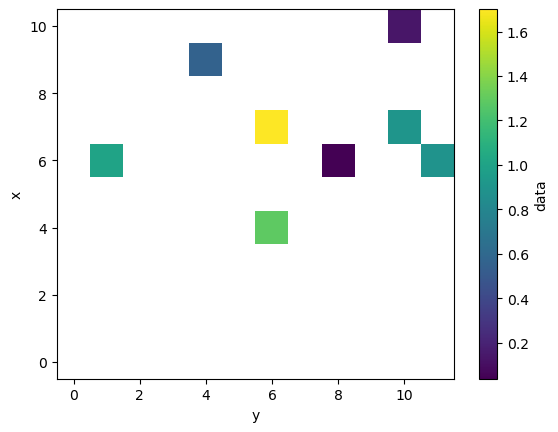

In [12]:
abs(data).isel(t=0).where(mask).plot()

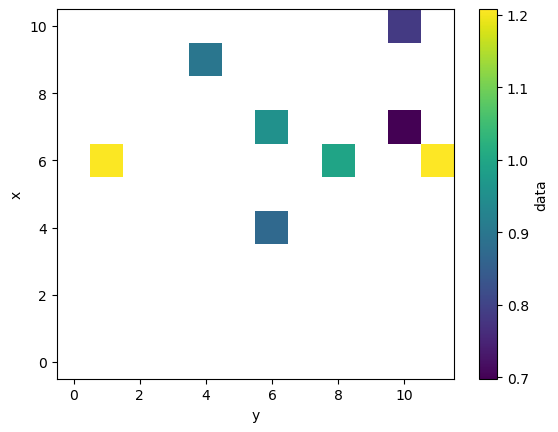

In [13]:
data.std("t").where(mask).plot()

,data
y,
0,NaN
1,0.023629
2,NaN
3,NaN
4,-0.323502
5,NaN
6,0.117482
7,NaN
8,0.088040


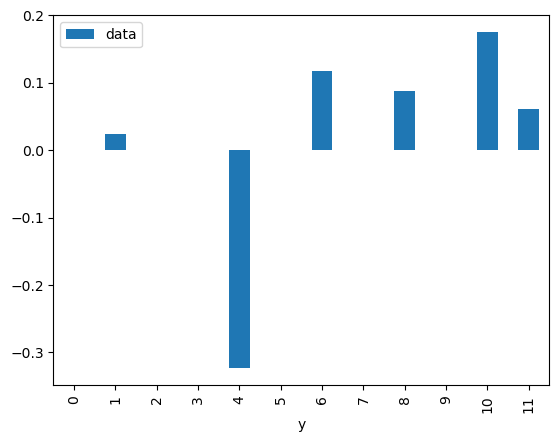

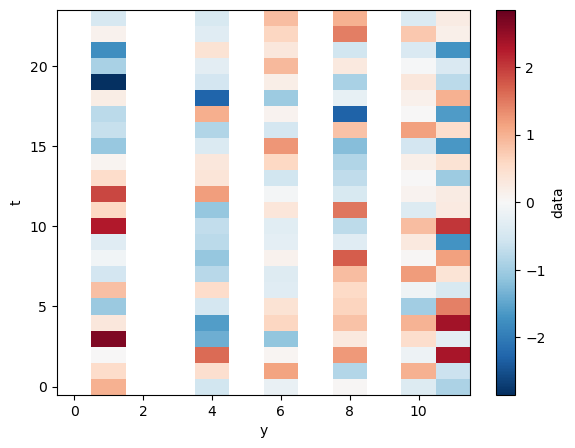

In [14]:
data.where(mask).mean("x").mean("t").to_dataframe().plot.bar()  #.mean("y")
display(data.where(mask).mean("x").mean("t").to_dataframe())
data.where(mask).mean("x").T.plot(size=5)

In [15]:
xr.DataArray([1, 2, np.nan, 4]).mean() == (1 + 2 + 0 + 4) / (1 + 1 + 0 + 1)

<xarray.DataArray ()>
array(True)

In [16]:
xr.DataArray([1, 2, 0, 4]).mean() == (1 + 2 + 0 + 4) / (1 + 1 + 1 + 1)

<xarray.DataArray ()>
array(True)

In [17]:
xr.DataArray([np.nan, np.nan]).mean()

<xarray.DataArray ()>
array(nan)

In [18]:
np.nan * np.Inf

nan

,dta
y,
0,0.000000
1,0.002148
2,0.000000
3,0.000000
4,-0.029409
5,0.000000
6,0.021360
7,0.000000
8,0.008004


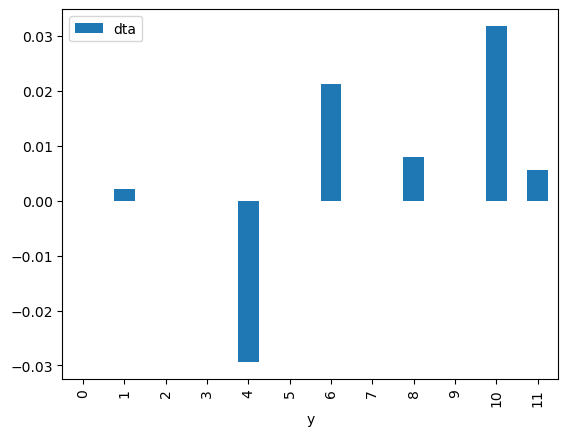

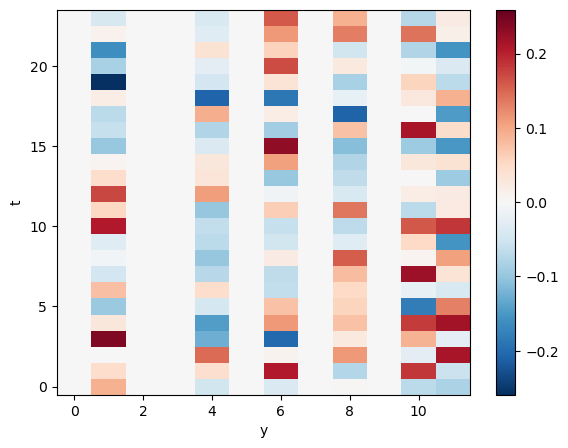

In [19]:
(data * mask).mean("x").mean("t").rename("dta").to_dataframe().plot.bar()  #.mean("y")
display((data * mask).mean("x").mean("t").rename("dta").to_dataframe())
(data * mask).mean("x").T.plot(size=5)

In [20]:
# data = data.transpose("t", "x", "y")
valid_data = (data.values[0, :, :] > 0.1)
ds = xr.Dataset()
ds["data"] = data
ds["valid_data"] = (("y", "t"), valid_data)
ds

<xarray.Dataset>
Dimensions:     (x: 11, y: 12, t: 24)
Dimensions without coordinates: x, y, t
Data variables:
    data        (x, y, t) float32 -1.146 0.8526 -0.1864 ... -0.5754 -0.6743
    valid_data  (y, t) bool False True False False ... False False True True

In [21]:
data = xr.DataArray(
    darr.random.normal(size=(11, 12, 24)).astype("float32"),
    dims=("x", "y", "t"),
    name="data",
)

data

<xarray.DataArray 'data' (x: 11, y: 12, t: 24)>
dask.array<astype, shape=(11, 12, 24), dtype=float32, chunksize=(11, 12, 24), chunktype=numpy.ndarray>
Dimensions without coordinates: x, y, t

In [22]:
# valid_data = (data.data[0, :, :] > 0.1)
valid_data = (data.isel(x=0) > 0.1)
ds = xr.Dataset()
ds["data"] = data
# ds["valid_data"] = (("y", "t"), valid_data)
ds["valid_data"] = valid_data
ds

<xarray.Dataset>
Dimensions:     (x: 11, y: 12, t: 24)
Dimensions without coordinates: x, y, t
Data variables:
    data        (x, y, t) float32 dask.array<chunksize=(11, 12, 24), meta=np.ndarray>
    valid_data  (y, t) bool dask.array<chunksize=(12, 24), meta=np.ndarray>

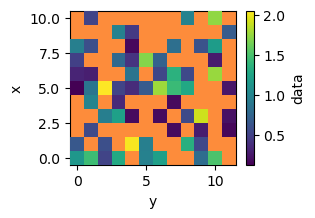

In [23]:
data = data.compute().where(data.compute() > 0.1)
# data

mask = ~data.isnull()
# mask

data.isnull().isnull().isel(t=0).plot(size=2, cmap="Oranges", zorder=-10, add_colorbar=False)
data.isel(t=0).plot(zorder=10)
# mask.isel(t=0).plot(size=2)

In [31]:
xr.DataArray([np.nan, np.nan]).sum().where(xr.DataArray([np.nan, np.nan]).count() > 0)

<xarray.DataArray ()>
array(nan)

In [29]:
data = [np.nan, np.nan]
summed = 0
normalize_by = 0
for d in data:
    if ~np.isnan(d):
        summed += d
        normalize_by += 1
        
print(summed)
print(summed / np.array(normalize_by))

0
nan


/tmp/ipykernel_1177/702144876.py:10: RuntimeWarning: invalid value encountered in divide
  print(summed / np.array(normalize_by))
